In [16]:
from langgraph.graph import StateGraph, START, END

############################################
# Dummy node implementations for existing steps
############################################

# Interactive Dialogue & Query Module
def interactive_dialogue(state):
    # Engage the user in a multi-turn dialogue to collect clarifications.
    pass

def audience_analyzer(state):
    # Analyze audience details (internal managers, CFO, board members).
    pass

# Input Ingestion & Document Processing Layer
def extract_business_plan(state):
    # Extract key details from an unstructured business plan (e.g., board meeting PDF).
    pass

def extract_financial_reports(state):
    # Process unstructured financial reports (Excel, PDF) to extract data.
    pass

def query_database(state):
    # Query financial databases directly when needed.
    pass

# Agentic Orchestration & Reasoning Framework
def clarification_node(state):
    # Ask the user clarifying questions when ambiguities arise.
    pass

def orchestrate_core(state):
    # The central orchestrator that manages submodules and flow.
    pass

def narrative_generation_node(state):
    # Generate templated narrative text based on user input and data.
    pass

def deck_construction_node(state):
    # Build the structure of the financial storyboard/deck.
    pass

# Narrative & Storyboard Generation Layer
def narrative_composer(state):
    # Compose narrative segments using templated guidelines.
    pass

def storyboard_organizer(state):
    # Organize narrative text, data queries, and visualization recommendations.
    pass

def json_formatter(state):
    # Package the final output as a JSON storyboard.
    pass

############################################
# New Nodes for Conditional Steps & Human-in-the-Loop
############################################

def check_discrepancy(state):
    # Check for discrepancies or conflicts between extracted data.
    pass

def discrepancy_routing(state):
    """
    Routing function for discrepancies.
    Returns:
      - "human_review" if a discrepancy is detected,
      - "query_database" if all is well.
    """
    # Dummy implementation: in practice, analyze `state` to decide.
    return "query_database"

def human_review(state):
    # Engage a human operator for review or additional clarification.
    pass

def check_human_intervention(state):
    # Check if additional human intervention is required during orchestration.
    pass

def human_intervention_routing(state):
    """
    Routing function to determine if human intervention is needed.
    Returns:
      - "human_review_orchestration" if intervention is required,
      - "orchestrate_core" if not.
    """
    return "orchestrate_core"

def human_review_orchestration(state):
    # A node for human input during orchestration.
    pass

def check_narrative(state):
    # Check if the generated narrative requires human review.
    pass

def narrative_routing(state):
    """
    Routing function for narrative review.
    Returns:
      - "human_review_narrative" if review is needed,
      - "storyboard_organizer" if not.
    """
    return "storyboard_organizer"

def human_review_narrative(state):
    # Engage a human operator to review the narrative content.
    pass

############################################
# Build Subgraph: Input Ingestion & Document Processing
############################################
input_ingestion = StateGraph(dict)

input_ingestion.add_node("extract_business_plan", extract_business_plan)
input_ingestion.add_node("extract_financial_reports", extract_financial_reports)
input_ingestion.add_node("check_discrepancy", check_discrepancy)
input_ingestion.add_node("human_review", human_review)  # Human in the loop for data review
input_ingestion.add_node("query_database", query_database)

input_ingestion.add_edge(START, "extract_business_plan")
input_ingestion.add_edge("extract_business_plan", "extract_financial_reports")
input_ingestion.add_edge("extract_financial_reports", "check_discrepancy")

# Conditional branch: if discrepancy exists, go to human_review; otherwise, proceed to query_database.
input_ingestion.add_conditional_edges(
    "check_discrepancy",
    discrepancy_routing,
    ["human_review", "query_database"]
)
# After human review, continue to query_database.
input_ingestion.add_edge("human_review", "query_database")
input_ingestion.add_edge("query_database", END)

input_ingestion_subgraph = input_ingestion.compile()

############################################
# Build Subgraph: Agentic Orchestration & Reasoning Framework
############################################
orchestration = StateGraph(dict)

orchestration.add_node("interactive_dialogue", interactive_dialogue)
orchestration.add_node("clarification_node", clarification_node)
orchestration.add_node("check_human_intervention", check_human_intervention)
orchestration.add_node("human_review_orchestration", human_review_orchestration)
orchestration.add_node("orchestrate_core", orchestrate_core)
orchestration.add_node("narrative_generation", narrative_generation_node)
orchestration.add_node("deck_construction", deck_construction_node)

orchestration.add_edge(START, "interactive_dialogue")
orchestration.add_edge("interactive_dialogue", "clarification_node")
orchestration.add_edge("clarification_node", "check_human_intervention")

# Conditional branch: if human intervention is needed, route to human_review_orchestration; else proceed to orchestrate_core.
orchestration.add_conditional_edges(
    "check_human_intervention",
    human_intervention_routing,
    ["human_review_orchestration", "orchestrate_core"]
)
# After human review in orchestration, continue with orchestrate_core.
orchestration.add_edge("human_review_orchestration", "orchestrate_core")
orchestration.add_edge("orchestrate_core", "narrative_generation")
orchestration.add_edge("narrative_generation", "deck_construction")
orchestration.add_edge("deck_construction", END)

orchestration_subgraph = orchestration.compile()

############################################
# Build Subgraph: Narrative & Storyboard Generation
############################################
narrative_storyboard = StateGraph(dict)

narrative_storyboard.add_node("narrative_composer", narrative_composer)
narrative_storyboard.add_node("check_narrative", check_narrative)
narrative_storyboard.add_node("human_review_narrative", human_review_narrative)
narrative_storyboard.add_node("storyboard_organizer", storyboard_organizer)
narrative_storyboard.add_node("json_formatter", json_formatter)

narrative_storyboard.add_edge(START, "narrative_composer")
narrative_storyboard.add_edge("narrative_composer", "check_narrative")

# Conditional branch: if the narrative requires human review, route to human_review_narrative; else continue to storyboard_organizer.
narrative_storyboard.add_conditional_edges(
    "check_narrative",
    narrative_routing,
    ["human_review_narrative", "storyboard_organizer"]
)
# After human narrative review, continue to storyboard organizer.
narrative_storyboard.add_edge("human_review_narrative", "storyboard_organizer")
narrative_storyboard.add_edge("storyboard_organizer", "json_formatter")
narrative_storyboard.add_edge("json_formatter", END)

narrative_storyboard_subgraph = narrative_storyboard.compile()

############################################
# MAIN GRAPH: Overall Architecture with Conditional Steps & Human-in-the-Loop
############################################
graph = StateGraph(dict)

# Add the primary nodes (which include our subgraphs and other components)
graph.add_node("Audience_Analyzer", audience_analyzer)
graph.add_node("Input_Ingestion", input_ingestion_subgraph)
graph.add_node("Agentic_Orchestration", orchestration_subgraph)
graph.add_node("Narrative_Storyboard", narrative_storyboard_subgraph)

# Define the overall flow:
# 1. Analyze the audience.
# 2. Ingest and process documents with discrepancy checks and potential human review.
# 3. Orchestrate the multi-turn dialogue, with conditional human intervention as needed.
# 4. Generate narrative content and assemble the final JSON storyboard with optional human review.
graph.add_edge(START, "Audience_Analyzer")
graph.add_edge("Audience_Analyzer", "Input_Ingestion")
graph.add_edge("Input_Ingestion", "Agentic_Orchestration")
graph.add_edge("Agentic_Orchestration", "Narrative_Storyboard")
graph.add_edge("Narrative_Storyboard", END)

# Compile the main graph
app = graph.compile()

# Optionally, visualize the graph if supported by langgraph:
# app.visualize()


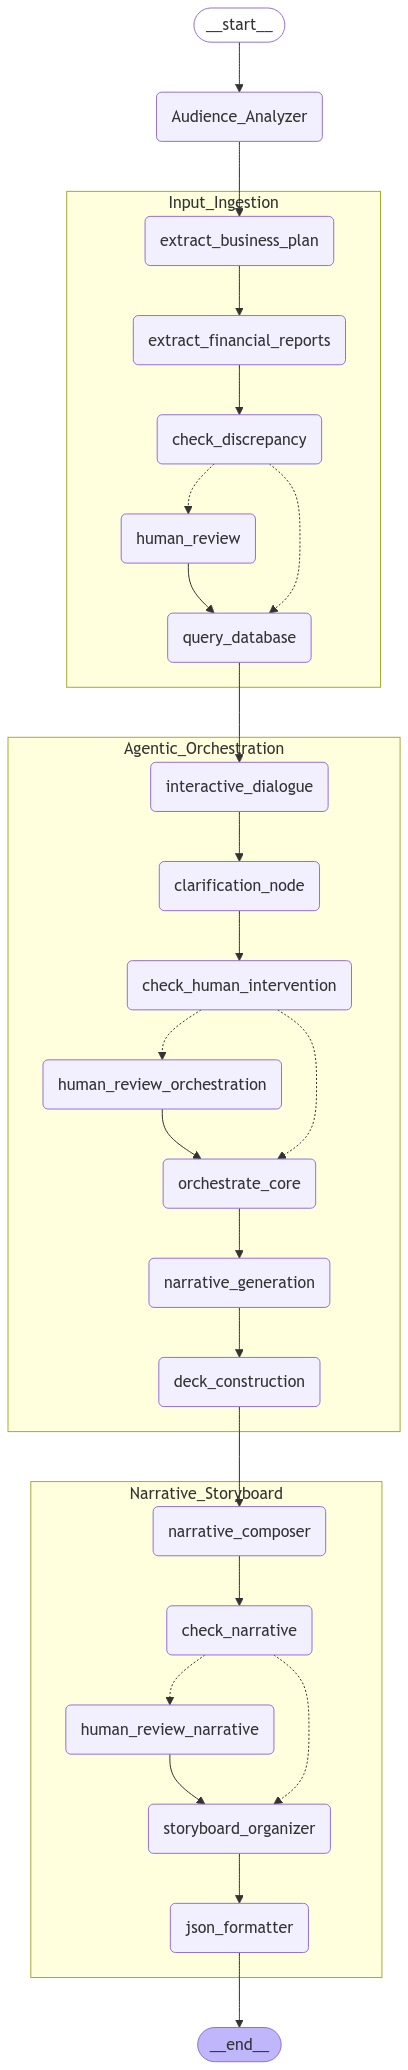

: 

In [17]:
from IPython.display import Image
Image(app.get_graph(xray=1).draw_mermaid_png())